# MATH2504 Project 1 - 2023

## Emmanuel Skoufris - 46388078 

GitHub repository for this project: https://github.com/ESkoufris/Emmanuel-Skoufris-2504-2023-PROJECT1.git

### Tests

In [1]:
using Pkg
Pkg.activate(".")

include("poly_factorization_project.jl")

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`

10	25	35	


(i, value) = (10, "kbwcr")
(i, value) = (20, "dcsha")
(i, value) = (30, "oxgil")
(i, value) = (40, "xteol")
(i, value) = (50, "amqcl")
(i, value) = (60, "olqwn")
(i, value) = (70, "tdcjf")
(i, value) = (80, "dxksw")
(i, value) = (90, "yvzkb")
(i, value) = (100, "qbimw")


l = MutableLinkedList{String}(amqcl, dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
d[50] = DataStructures.ListNode{String}(amqcl)
d[90] = DataStructures.ListNode{String}(yvzkb)
get_element(l, d, 50) = "amqcl"
l = MutableLinkedList{String}(dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
length(l) = 9
get_element(l, d, 50) = nothing
get_next_element(l, d, 90) = nothing
get_element(l, d, 40) = "xteol"
get_next_element(l, d, 40) = "yvzkb"

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`


  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`

In [3]:
include("test/runtests.jl")

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`


10	25	35	
(i, value) = (10, "kbwcr")
(i, value) = (20, "dcsha")
(i, value) = (30, "oxgil")
(i, value) = (40, "xteol")
(i, value) = (50, "amqcl")
(i, value) = (60, "olqwn")
(i, value) = (70, "tdcjf")
(i, value) = (80, "dxksw")
(i, value) = (90, "yvzkb")
(i, value) = (100, "qbimw")
l = MutableLinkedList{String}(amqcl, dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
d[50] = DataStructures.ListNode{String}(amqcl)
d[90] = DataStructures.ListNode{String}(yvzkb)
get_element(l, d, 50) = "amqcl"
l = MutableLinkedList{String}(dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
length(l) = 9
get_element(l, d, 50) = nothing
get_next_element(l, d, 90) = nothing
get_element(l, d, 40) = "xteol"
get_next_element(l, d, 40) = "yvzkb"


  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`
  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`


test_euclid_ints - PASSED
test_ext_euclid_ints - PASSED


prod_test_poly - PASSED


prod_derivative_test_poly - PASSED


ext_euclid_test_poly - PASSED


division_test_poly - PASSED


prod_test_poly_sparse - PASSED


prod_derivative_test_poly_sparse - PASSED


ext_euclid_test_poly_sparse - PASSED


division_test_poly_sparse - PASSED
overflow_test- PASSED


prod_test_poly_Sparse128 - PASSED

prod_derivative_test_poly_Sparse128 - PASSED


ext_euclid_test_poly_Sparse128 - PASSED


division_test_poly_Sparse128 - PASSED


crt_multiply_test_poly_sparse - PASSED


pow_mod_test - PASSED


## Task 1

### Example script 2

See the file example_script2.jl.

### Pretty printing 

I created a 'superscript' function that prints a number in superscript using Unicode.

In [5]:
function superscript(n::Integer)

    digit_to_unicode = Dict(
        '0' => 0x2070,
        '1' => 0x00B9,
        '2' => 0x00B2,
        '3' => 0x00B3,
        '4' => 0x2074,
        '5' => 0x2075,
        '6' => 0x2076,
        '7' => 0x2077,
        '8' => 0x2078,
        '9' => 0x2079 
    )

    n_str = string(n)

    unicode_str = ""

    for i in n_str
        unicode_digit = Char(digit_to_unicode[i])
        unicode_str *= unicode_digit
    end

    return unicode_str
end

superscript (generic function with 1 method)

I then altered the show function for individual polynomial terms. 

In [6]:
function show(io::IO, t::Term)  

    iszero(t.coeff) && return print(io,"0")
    iszero(t.degree) && return print(io,t.coeff)

    if abs(t.coeff) == 1
        print(io, t.coeff == 1 ? "x" : "-x", t.degree == 1 ? "" : superscript(t.degree)) 
    else 
        print(io, "$(t.coeff)x", t.degree == 1 ? "" : superscript(t.degree))
    end
    
end

show (generic function with 358 methods)

Finally, I altered the show function for polynomials. 

In [3]:
# By default, print from highest to lowest powers. 
global lowest_to_highest = false

# modified show for polynomials  
function show(io::IO, p::PolynomialDense) 

    if iszero(p)
        print(io,"0")
    else
        n = length(p.terms)
        (hasproperty(Main, :lowest_to_highest) && lowest_to_highest) ?  p_terms = p.terms  : p_terms = reverse(p.terms)
        for (i,t) in enumerate([y for y in p_terms if !iszero(y)])
            print(io, i==1 ? "$t" : (t.coeff ≥ 0 ? " + $t" : " - $(-t)"))
        end
    end
    
end

show (generic function with 361 methods)

In [4]:
x = x_poly();

print(x^2 - 5x^3 - x + 0*x^6 + 400x^4)

400x⁴ - 5x³ + x² - x

## Task 2

I have implemented PolynomialSparse in new files in the source code, making appropriate changes where needed. 

Here are the tests for PolynomialSparse:

In [2]:
include("test/polynomial_sparse_tests.jl")
prod_test_poly_sparse()
prod_derivative_test_poly_sparse()
ext_euclid_test_poly_sparse()
division_test_poly_sparse()

prod_test_poly_sparse - PASSED


prod_derivative_test_poly_sparse - PASSED


ext_euclid_test_poly_sparse - PASSED


division_test_poly_sparse - PASSED


### Operations on random polynomials

Average for PolynomialDense: 7.669e-5
Average for PolynomialSparse: 9.5628e-5


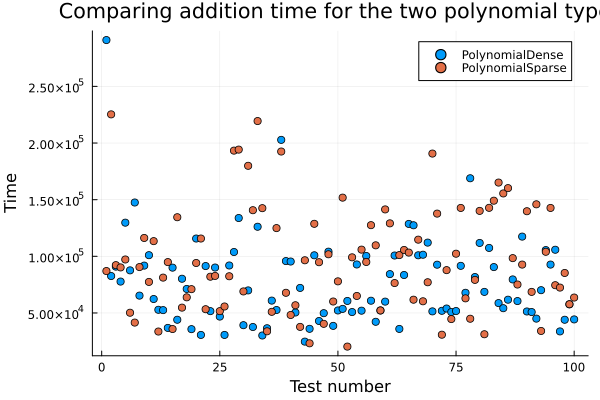

In [22]:

using Plots
times = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = rand(PolynomialDense)
    q = rand(PolynomialDense)
    p + q
    end_time = time_ns()
    times[n] = end_time - start_time
end

p1 = scatter(1:100, times, label = "PolynomialDense")

times1 = zeros(100)

for n in 1:100
    p = rand(PolynomialSparse)
    q = rand(PolynomialSparse)
    start_time = time_ns()
    p + q
    end_time = time_ns()
    times1[n] = end_time - start_time
end

println("Average for PolynomialDense: $(mean(times)/10^9)")
println("Average for PolynomialSparse: $(mean(times1)/10^9)")

p2 = scatter!(1:100, times1, label = "PolynomialSparse", title ="Comparing addition time for the two polynomial types",
           xlab = "Test number", ylab = "Time" )

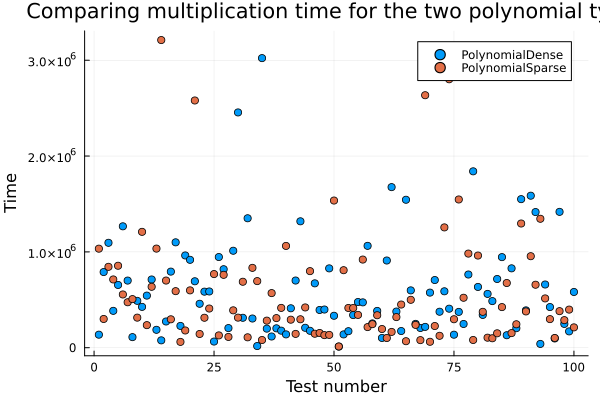

In [10]:

using Plots
times = zeros(100)

for n in 1:100
    p = rand(PolynomialDense)
    q = rand(PolynomialDense)
    start_time = time_ns()
    p*q
    end_time = time_ns()
    times[n] = end_time - start_time
end

p1 = scatter(1:100, times, label = "PolynomialDense")

times1 = zeros(100)

for n in 1:100
    p = rand(PolynomialSparse)
    q = rand(PolynomialSparse)
    start_time = time_ns()
    p*q
    end_time = time_ns()
    times1[n] = end_time - start_time
end

p2 = scatter!(1:100, times1, label = "PolynomialSparse", title ="Comparing multiplication time for the two polynomial types",
           xlab = "Test number", ylab = "Time" )
    

### Operations on very sparse polynomials

#### Addition

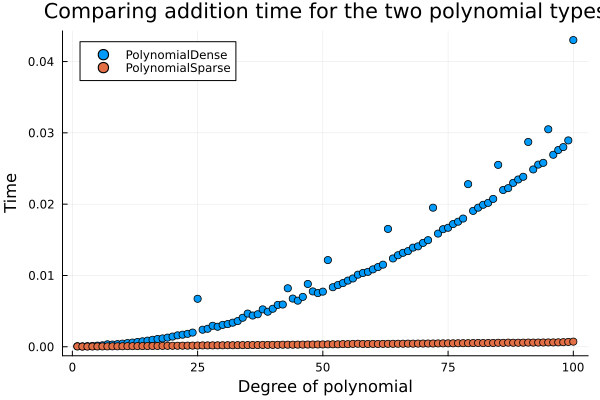

In [24]:
x = x_poly()
q = x^5

using Plots
times = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = x^n 
    p + q
    end_time = time_ns()
    times[n] = (end_time - start_time)/10^9
end

p1 = scatter(1:100, times, label = "PolynomialDense")

y = x_polysparse()
u = y^5

times1 = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = y^n 
    p + u
    end_time = time_ns()
    times1[n] = (end_time - start_time)/10^9
end

p2 = scatter!(1:100, times1, label = "PolynomialSparse", title ="Comparing addition time for the two polynomial types",
           xlab = "Degree of polynomial", ylab = "Time" )
     


#### Multiplication 

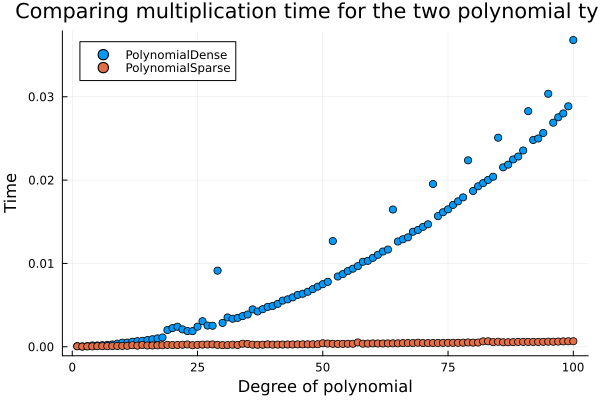

In [25]:
x = x_poly()
q = x^5

using Plots
times = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = x^n 
    p*q
    end_time = time_ns()
    times[n] = (end_time - start_time)/10^9
end

p1 = scatter(1:100, times, label = "PolynomialDense")

y = x_polysparse()
u = y^5

times1 = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = y^n 
    p*u
    end_time = time_ns()
    times1[n] = (end_time - start_time)/10^9
end

p2 = scatter!(1:100, times1, label = "PolynomialSparse", title ="Comparing multiplication time for the two polynomial types",
           xlab = "Degree of polynomial", ylab = "Time" )

### Comparison of factorisation 

In [52]:
x = x_poly()
q = x^5

using Plots
times = zeros(5)

prime = 11

for n in 1:5
    start_time = time_ns()
    p = rand(PolynomialDense)
    factor(p, 11)
    end_time = time_ns()
    times[n] = end_time - start_time
end

average1 = mean(times)/10^9

println("On average, it takes $(average1) seconds to factorise a dense polynomial modulo 11")

y = x_polysparse()

times1 = zeros(5)

for n in 1:5
    start_time = time_ns()
    p = rand(PolynomialSparse)
    factor(p, 11)
    end_time = time_ns()
    times1[n] = end_time - start_time
end

average2 = mean(times1)/10^9

println("On average, it takes $(average2) seconds to factorise a sparse polynomial modulo 11")
println("On average, it is $(average1/average2) times faster to factorise a sparse polynomial modulo 11 as opposed to a dense polynomial")

On average, it takes 4.86284846 seconds to factorise a dense polynomial modulo 11


On average, it takes 0.1401579 seconds to factorise a sparse polynomial modulo 11
On average, it is 34.69550028931655 times faster to factorise a sparse polynomial modulo 11 as opposed to a dense polynomial


As seen in the plots, addition and multiplication on randomly generated polynomials of type PolynomialDense is very similar in terms of performance, with PolynomialDense usually slightly beating PolynomialSparse. 

However, operations on very sparse polynomials with large degrees is vastly more efficient with PolynomialSparse. This is because of the wastefulness of PolynomialDense, which stores zero terms up to the last nonzero term. We can see that the time taken for PolynomialSparse remains roughly constant, whereas multiplication and addition seems to be $O(n^2)$ (just a guess) with PolynomialDense. Therefore, factoring a random polynomial, a quite intensive process which involves very sparse polynomials of high degree, is extremely more efficient with PolynomialSparse. 

Nonetheless, one advantage of PolynomialDense is that its implementation is much more simple than that of PolynomialSparse and therefore relies on much less extra "machinery" in order for its associated functions to work properly. 

## Task 3

In [42]:
x = x_polysparse()

f = PolynomialSparse([Term(2^(i+5),i) for i in 1:5])

println("f = $f") # f only has positive coefficients, so any powers of f should only contain positive coefficients unless there is overflow.  

print("lc(($f)^9) = $(leading(f^9))")


f = 1024x⁵ + 512x⁴ + 256x³ + 128x² + 64x
lc((1024x⁵ + 512x⁴ + 256x³ + 128x² + 64x)^9) = -9223372036854775808x¹⁸

As we can see above, $f^9$ has a negative leading coefficient, even though $f$ only had postive coefficients. 

In [44]:
x = x_polysparse128()

# Ideally, for PolynomialSparse128, we shouldn't be passing through terms with Int64 coefficients as has been done here. 
f = PolynomialSparse128([Term(2^(i+5),i) for i in 1:5])

println("p(x) = $f") # f only has positive coefficients, so any powers of f should only contain positive coefficients unless there is overflow.  

f^9

p(x) = 1024x⁵ + 512x⁴ + 256x³ + 128x² + 64x


1237940039285380274899124224x⁴⁵ + 5570730176784211237046059008x⁴⁴ + 13926825441960528092615147520x⁴³ + 25532513310260968169794437120x⁴² + 38298769965391452254691655680x⁴¹ + 49440230318959874728783773696x⁴⁰ + 56519699918623143175863140352x³⁹ + 58318581538209711387825930240x³⁸ + 55054481825250212616119255040x³⁷ + 48006444296896924527582248960x³⁶ + 38940709575606820346460635136x³⁵ + 29545542568471729715231588352x³⁴ + 21057976620412321936913203200x³³ + 14144432089491161344062259200x³² + 8976274210638621622193356800x³¹ + 5392564734118505262423736320x³⁰ + 3071143818469445068275056640x²⁹ + 1659675700404536810353459200x²⁸ + 851560736023468773159731200x²⁷ + 414918925101134202588364800x²⁶ + 191946488654340316767191040x²⁵ + 84258823970601644725370880x²⁴ + 35063571135307115711692800x²³ + 13812921962393712250060800x²² + 5141107573342852035379200x²¹ + 1803316807157698346876928x²⁰ + 594188073358258367102976x¹⁹ + 183130051791751573667840x¹⁸ + 52504045319795811287040x¹⁷ + 13904233345558574530560x¹⁶ + 3

Using PolynomialSparse128 however, we do not get any overflow for this particular example. 

Here are the tests for PolynomialSparse128:

In [45]:
include("test/polynomial_sparse_tests.jl")
prod_test_poly_sparse128()
prod_derivative_test_poly_sparse128()
ext_euclid_test_poly_sparse128()
division_test_poly_sparse128()
overflow_test()

prod_test_poly_Sparse128 - PASSED


prod_derivative_test_poly_Sparse128 - PASSED


ext_euclid_test_poly_Sparse128 - PASSED


division_test_poly_Sparse128 - PASSED
overflow_test- PASSED


Now let's compare PolynomialSparse and PolynomialSparse128 in terms of mutliplication.

In [44]:
times = zeros(100)

for n in 1:100
    p = PolynomialSparse([Term(2^i, n) for i in 1:15])
    q = PolynomialSparse([Term(3^i, n) for i in 1:15])
    start_time = time_ns()
    p*q
    end_time = time_ns()
    times[n] = (end_time - start_time)/10^9
end 

average = mean(times)

times1 = zeros(100)

for n in 1:100
    p = PolynomialSparse128([Term128(2^i, n) for i in 1:15])
    q = PolynomialSparse128([Term128(3^i, n) for i in 1:15])
    start_time = time_ns()
    p*q
    end_time = time_ns()
    times1[n] = (end_time - start_time)/10^9
end 

println("On average, multiplication using PolynomialSparse is $(average1/average) times faster")

On average, multiplication using PolynomialSparse is 1.224566338490389 times faster


As we can see, multiplication using both methods is quite comparable. PolynomialSparse tends to perform a bit better however.

## Task 4

See the file polynomial_modp.jl for the implementation of this new type and its associated operations. The function pow_mod in polynomial_sparse.jl was altered using the updated methods.

In [78]:
function pow_mod(p::PolynomialSparse, n::Int, prime::Int)
     ## OLD METHOD ##
    #= n < 0 && error("No negative power")
    out = one(p)
    for _ in 1:n
        out *= p
        out = mod(out, prime)
    end
    return out =#
    return (PolynomialModP(p, prime)^n).polynomial
end

pow_mod (generic function with 3 methods)

Here are the results of the tests for PolynomialModP, whose implementations can be found in the file polynomial_modp_test.jl.

In [46]:
include("test/polynomial_modp_tests.jl")
prod_test_poly_modp()
prod_derivative_test_poly_modp()
division_test_poly_modp()
ext_euclid_test_poly_modp()

prod_test_poly_modp - PASSED


division_test_poly_modp - PASSED


ext_euclid_test_poly_modp - PASSED


## Task 5

I wrote my own Chinese Remainder Theorem function, and it is included in the file general_alg.jl.

In [55]:
a = rand(Int,4)

n = crt(a,[5,7,13,17])

5160

I then implemented polynomial multiplication using the CRT in the file polynomial_modp.jl, for both PolynomialSparse and PolynomialSparse128. Here is the code for PolynomialSparse:

In [85]:
function crt_poly(a::PolynomialSparse128, b::PolynomialSparse128, m_a::Integer, m_b::Integer)
    c = PolynomialModP128(zero(PolynomialSparse128), m_a*m_b)
    n = max(degree(a),degree(b))
    for k in push!(reverse(collect(1:n)),0)
        k > degree(a) || !haskey(a.dict, k) ? ak = 0 : ak = get_element(a.terms, a.dict, Int128(k)).coeff
        k > degree(b) || !haskey(b.dict, k) ? bk = 0 : bk = get_element(b.terms, b.dict, Int128(k)).coeff
        ck = crt([ak,bk], [m_a, m_b])
        c += ck*x_polysparse128()^k
    end
    return c
end 

function crt_multiply(a::PolynomialSparse128, b::PolynomialSparse128)
    height_a = maximum(abs.(coeffs(a)))
    height_b = maximum(abs.(coeffs(b)))

    B = 2*height_a*height_b*min(degree(a) + 1,degree(b) + 1)
    p = 3
    M = p
    c = PolynomialModP128(a*b, M)
    
    while M < B
        p = nextprime(p+1)
        c1 = PolynomialModP128(a*b, p)
        c = crt_poly(c.polynomial, c1.polynomial, M, p)
        M = M*p
    end
    return smod(c.polynomial, M)
end


crt_multiply (generic function with 2 methods)

Here are some examples:

In [86]:
a, b = rand(PolynomialSparse), rand(PolynomialSparse)

(88x⁸ + 30x⁷ + 65x⁵ + 22x⁴ + 75x² + 18, 62x⁵ + 14x⁴ + 42x³ + 83x² + 37x + 69)

In [87]:
crt_multiply(a, b) 

5456x¹³ + 3092x¹² + 4116x¹¹ + 12594x¹⁰ + 8020x⁹ + 10220x⁸ + 13039x⁷ + 5281x⁶ + 9565x⁵ + 7995x⁴ + 3531x³ + 6669x² + 666x + 1242

In [88]:
a, b = rand(PolynomialSparse128), rand(PolynomialSparse128)

(55x² + 52x, 12x⁵ + 59x⁴ + 50x²)

In [89]:
crt_multiply(a, b) == a*b

true

Here's the test for polynomial multiplication using the CRT:

In [90]:
function crt_multiply_test_poly_sparse(;N::Int = 100)
    for _ in 1:N
        p1 = rand(PolynomialSparse)
        p2 = rand(PolynomialSparse)
        crt_multiply(p1,p2) != p1*p2 && println("p1 = $(p1)", "\n","p2 = $(p2)", "\n", crt_multiply(p1,p2), "\n", p1*p2) # used for debugging 
        @assert crt_multiply(p1,p2) == p1*p2
    end 
    println("crt_multiply_test_poly_sparse - PASSED")
end

crt_multiply_test_poly_sparse (generic function with 1 method)

In [109]:
include("test/polynomial_sparse_tests.jl")
crt_multiply_test_poly_sparse()

crt_multiply_test_poly_sparse - PASSED


### Benchmarking CRT multiplication

In [15]:
c = PolynomialSparse128()

for n in 1:10
    c += PolynomialSparse128([Term128(1,1), Term(Int128(2)^n, Int128(2)^n)])
end


## Task 6

I added a new function pow_mod into the file general_alg.jl, which computes $n^m\mod p$ efficiently using repeated squaring.

In [16]:
function pow_mod_efficient(x::Integer, m::Integer, p::Integer)
    max_pow = floor(Int, log2(m)) # computing the position of the leftmost bit.

    w = [x]
    
    for i in 1:max_pow
        w = push!(w, w[end]^2)
    end 

    ans = 1

    for i in 0:max_pow
        if m & (1 << i) != 0 # check if the ith bit of m is 1
            ans = mod(w[i+1]*ans,p)
        end
    end
    return ans
end

pow_mod_efficient(5,20,7) # computes 5^20 mod 7 

4

I then implemented a similar method of expoenentiation for PolynomialModP128, as seen in the file polynomial_modp.jl. I also did the same thing for PolynomialSparse128, as seen in polynomial_sparse_multiplication under the name pow_mod_efficient. 

In [17]:
function ^(f::PolynomialModP128, m::Integer)
    max_pow = floor(Int, log2(m)) # computing the position of the leftmost bit.

    w = [f]
    
    for i in 1:max_pow
        w = push!(w, w[end]*w[end])
    end 

    ans =  PolynomialModP128(one(PolynomialSparse128), f.prime)  

    for i in 0:max_pow
        if m & (1 << i) != 0 # check if the ith bit of m is 1
            ans *= w[i+1]
        end
    end
    return ans
end

^ (generic function with 77 methods)

In [18]:
x = x_polysparse128()

Random.seed!(2)

p = rand(PolynomialSparse128)

@time PolynomialModP128(p,5)^20
@time mod(p^20,5)

  0.004811 seconds (13.60 k allocations: 832.359 KiB)


  0.177181 seconds (423.18 k allocations: 26.855 MiB)


3x⁵⁹ + 2x⁵⁸ + 3x⁵⁶ + x⁵⁵ + x⁵⁴ + x⁵³ + 2x⁵² + 4x⁵¹ + 2x⁵⁰ + 2x⁴⁹ + 3x⁴⁸ + 3x⁴⁷ + 4x⁴⁶ + 4x⁴⁴ + 3x⁴² + 2x⁴¹ + 2x³⁹ + x³⁸ + 4x³⁷ + 2x³⁶ + x³⁵ + 4x³⁴ + x³³ + 3x³² + 4x³¹ + 2x²⁸ + 3x²⁶ + x²⁵ + 3x²⁴ + 3x²³ + 2x¹⁸ + 2x¹⁷ + x¹⁶ + 4x¹⁵ + 2x¹⁴ + 2x¹¹ + x¹⁰ + 3x⁹ + x⁸ + x⁷ + 4x⁶ + 3x⁵ + 4x⁴ + 2x³ + 3x² + 2x + 1

We can see here how just how much faster this new method of exponentiation is! Here are the tests for this new method:

In [22]:
include("test/polynomial_sparse_tests.jl")
include("test/polynomial_modp_tests.jl")
pow_mod_test()
repeated_squaring_test()

pow_mod_test - PASSED


repeated_squaring_test - PASSED


Finally, I've written a new file factor_improved.jl which implements factorisation for polynomials of type PolynomialModP. In particular, it uses the new, more efficient method of exponentation. Here is an example:

In [2]:
x = x_polysparse128()

f = (x^2 + 6)^2*(x+3)^7*(50x^9)*(-100x^3 + x^2 - x^7 + 1)*(x+5)*(-8x + x^2)*(x^2 + 1)^5

q = PolynomialModP128(f, 23)

println("q = $q")

factor(q)

## Bonus Task

Dr. Maitihili Mehta started off the seminar by explaining her early relationship with mathematics. Remarkably, her family was one of mathematicians, and as such she was always exposed to the deeper side of mathematics that is often elided in primary and high school. On the other hand, it is clear that she had very little experience with software and computers during the early portion of her life. Dr Mehta had studied pure mathematics as an undergraduate student and eventually completed an honours project in partial differential equations and went on to complete a PhD. She then obtained her first job at the company Opcom, where she was tasked with writing algorithms, despite having no experience in programming. Interestingly, she adapted quickly to her role due to her pure maths background, which allowed her to learn quickly all the the technical aspects of coding.  

The mining company Deswik then employed Maithili as a senior software engineer. Not only did she often have to deal with extremely large datasets, but she would also have to use old ("ancient", as she described it) technology.  



Dr Mehta now works at You. Smart. Thing. as a software engineer. 